**Arthur Silva Ferreira Coelho**

---

# Introdução

Variáveis

- Series_Title – Nome do filme
- Released_Year - Ano de lançamento
- Certificate - Classificação etária
- Runtime – Tempo de duração
- Genre - Gênero
- IMDB_Rating - Nota do IMDB
- Overview - Overview do filme
- Meta_score - Média ponderada de todas as críticas 
- Director – Diretor
- Star1 - Ator/atriz #1
- Star2 - Ator/atriz #2
- Star3 - Ator/atriz #3
- Star4 - Ator/atriz #4
- No_of_Votes - Número de votos
- Gross - Faturamento


In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Importando o dataset

In [123]:
df = pd.read_csv('datasets/desafio_indicium_imdb.csv')
df.shape

(999, 16)

In [124]:
df.head(5)

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


Como o dataset já é bem pequeno, não há necessidade de fazer um sample.

## Limpando o dataset

In [125]:
df.dtypes, df.columns, df.dtypes.unique()

(Unnamed: 0         int64
 Series_Title      object
 Released_Year     object
 Certificate       object
 Runtime           object
 Genre             object
 IMDB_Rating      float64
 Overview          object
 Meta_score       float64
 Director          object
 Star1             object
 Star2             object
 Star3             object
 Star4             object
 No_of_Votes        int64
 Gross             object
 dtype: object,
 Index(['Unnamed: 0', 'Series_Title', 'Released_Year', 'Certificate', 'Runtime',
        'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1',
        'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
       dtype='object'),
 array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object))

Released_year, Runtime e Gross são variáveis numéricas, mas estão como objetos.

In [126]:
df["Released_Year"].isnull().sum(),
df["Released_Year"].unique()

array(['1972', '2008', '1974', '1957', '2003', '1994', '1993', '2010',
       '1999', '2001', '1966', '2002', '1990', '1980', '1975', '2020',
       '2019', '2014', '1998', '1997', '1995', '1991', '1977', '1962',
       '1954', '1946', '2011', '2006', '2000', '1988', '1985', '1968',
       '1960', '1942', '1936', '1931', '2018', '2017', '2016', '2012',
       '2009', '2007', '1984', '1981', '1979', '1971', '1963', '1964',
       '1950', '1940', '2013', '2005', '2004', '1992', '1987', '1986',
       '1983', '1976', '1973', '1965', '1959', '1958', '1952', '1948',
       '1944', '1941', '1927', '1921', '2015', '1996', '1989', '1978',
       '1961', '1955', '1953', '1925', '1924', '1982', '1967', '1951',
       '1949', '1939', '1937', '1934', '1928', '1926', '1920', '1970',
       '1969', '1956', '1947', '1945', '1930', '1938', '1935', '1933',
       '1932', '1922', '1943', 'PG'], dtype=object)

Tem um ano "PG". provavelmente foi erro de digitação. não posso supor de que ano o filme é, por isso, vou remover esse dado da tabela.

In [127]:
problematic_values = ['PG']
df = df[df['Released_Year'] != 'PG']

In [128]:
df['Released_Year'] = df['Released_Year'].astype(int)
df['Runtime'] = df['Runtime'].str.replace(' min', '').astype(int)
df['Gross'] = df['Gross'].str.replace('$', '').str.replace(',', '').astype(float)
df.dtypes

Unnamed: 0         int64
Series_Title      object
Released_Year      int64
Certificate       object
Runtime            int64
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross            float64
dtype: object

In [129]:
pd.set_option('display.float_format', lambda x: f"{x:,.0f}" if pd.notna(x) else "NaN")

Há uma coluna "Unnamed' que parece ser o index das linhas

In [130]:
df = df.drop('Unnamed: 0', axis=1)

In [131]:
df.head(5)

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Godfather,1972,A,175,"Crime, Drama",9,An organized crime dynasty's aging patriarch t...,100,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9,When the menace known as the Joker wreaks havo...,84,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,The Godfather: Part II,1974,A,202,"Crime, Drama",9,The early life and career of Vito Corleone in ...,90,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,12 Angry Men,1957,U,96,"Crime, Drama",9,A jury holdout attempts to prevent a miscarria...,96,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,The Lord of the Rings: The Return of the King,2003,U,201,"Action, Adventure, Drama",9,Gandalf and Aragorn lead the World of Men agai...,94,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


In [132]:
df.shape

(998, 15)

Ótimo, de (999,16) foi para (998,15), o que significa que removemos com sucesso apenas aquela linha com 'PG' e agora temos dados numéricos com dtypes apropriados assim como a remoção da coluna Unnamed, que nçao tinha valor para nossa análise.

## Valores faltantes

In [133]:
df.isnull().sum()

Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [134]:
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
            'Valores faltantes': missing_data,
            'Porcentagem': missing_percent})
print(missing_df[missing_df['Valores faltantes'] > 0])

             Valores faltantes  Porcentagem
Certificate                101           10
Meta_score                 157           16
Gross                      169           17


A porcentagem de valores faltantes em 'meta_score' e 'certificate' é bem baixa. Quanto a 'gross', não posso presumir ou supor o faturamento de cada filme com essa informação faltante, por isso, vou dropar as linhas que possuem valores faltantes em qualqauer coluna.

In [135]:
df = df.dropna()

In [136]:
df.isnull().sum()

Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

Remover ou preencher (tratar) dados nulos é importante porque existem modelos que não permitem valores faltantes na hora do treinamento.

## Checando outliers

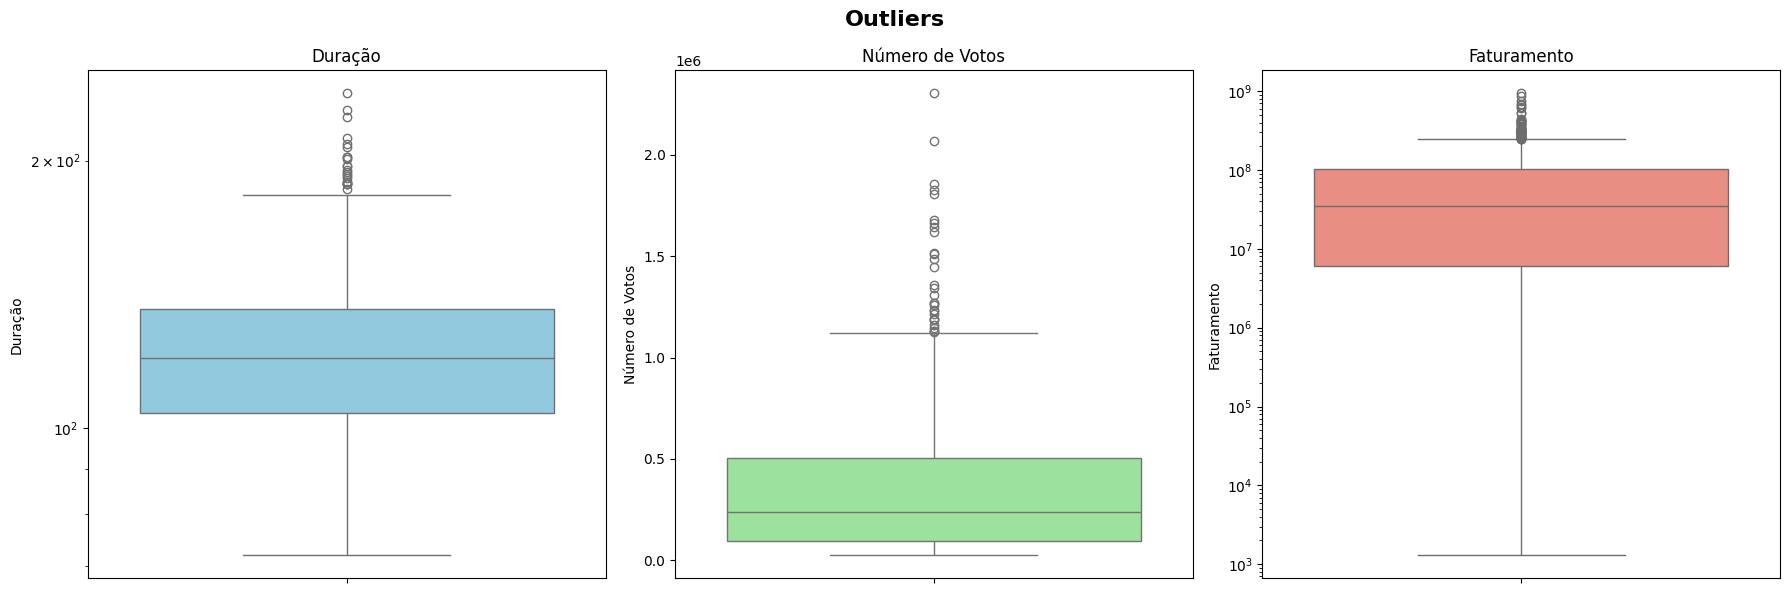

In [137]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Outliers', fontsize=16, fontweight='bold')

# Runtime
sns.boxplot(y=df['Runtime'], ax=axes[0], color='skyblue')
axes[0].set_title('Duração')
axes[0].set_ylabel('Duração')
axes[0].set_yscale('log')


# No_of_Votes
sns.boxplot(y=df['No_of_Votes'], ax=axes[1], color='lightgreen')
axes[1].set_title('Número de Votos')
axes[1].set_ylabel('Número de Votos')

# Gross
sns.boxplot(y=df['Gross'], ax=axes[2], color='salmon')
axes[2].set_title('Faturamento')
axes[2].set_ylabel('Faturamento')
axes[2].set_yscale('log')

plt.tight_layout()
plt.show()

Existem muitos outliers nos numeros de votos. Isso me faz questionar se devo removê-los ou se realmente pode acontecer de um filme ter tantos votos assim... Poderia remover os outliers, mas o resultado final ficará muito adulterado ou enviesado (a diferença é muito grande), por isso, vou deixar os outliers e acreditar que os filmes que receberam essa grande quantidade de votos é porque realmente mereceram :)

In [138]:
# limite_votos = 1000000  # 1.0e6

# df = df[df['No_of_Votes'] <= limite_votos]

In [139]:
# plt.figure(figsize=(8, 6))
# sns.boxplot(y=df['No_of_Votes'], color='lightgreen')
# plt.title('Número de Votos')
# plt.ylabel('Número de Votos')
# plt.show()

In [140]:
# limite_votos = 400000

# df = df[df['No_of_Votes'] <= limite_votos]

In [141]:
# fig, axes = plt.subplots(1, 3, figsize=(18, 6))
# fig.suptitle('Outliers', fontsize=16, fontweight='bold')

# # Runtime
# sns.boxplot(y=df['Runtime'], ax=axes[0], color='skyblue')
# axes[0].set_title('Duração')
# axes[0].set_ylabel('Duração')
# axes[0].set_yscale('log')


# # No_of_Votes
# sns.boxplot(y=df['No_of_Votes'], ax=axes[1], color='lightgreen')
# axes[1].set_title('Número de Votos')
# axes[1].set_ylabel('Número de Votos')

# # Gross
# sns.boxplot(y=df['Gross'], ax=axes[2], color='salmon')
# axes[2].set_title('Faturamento')
# axes[2].set_ylabel('Faturamento')
# axes[2].set_yscale('log')

# plt.tight_layout()
# plt.show()

---

# Análise Exploratória

In [142]:
df.describe()

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,712,712,712,712,712,712
mean,"1,996",124,8,77,"353,466","78,450,169"
std,19,26,0,12,"346,450","115,068,637"
min,"1,930",72,8,28,"25,229","1,305"
25%,"1,987",104,8,70,"95,665","6,143,199"
50%,"2,001",120,8,78,"235,982","34,850,146"
75%,"2,010",136,8,86,"506,543","102,360,615"
max,"2,019",238,9,100,"2,303,232","936,662,225"


## Analisando a distribuição dos dados

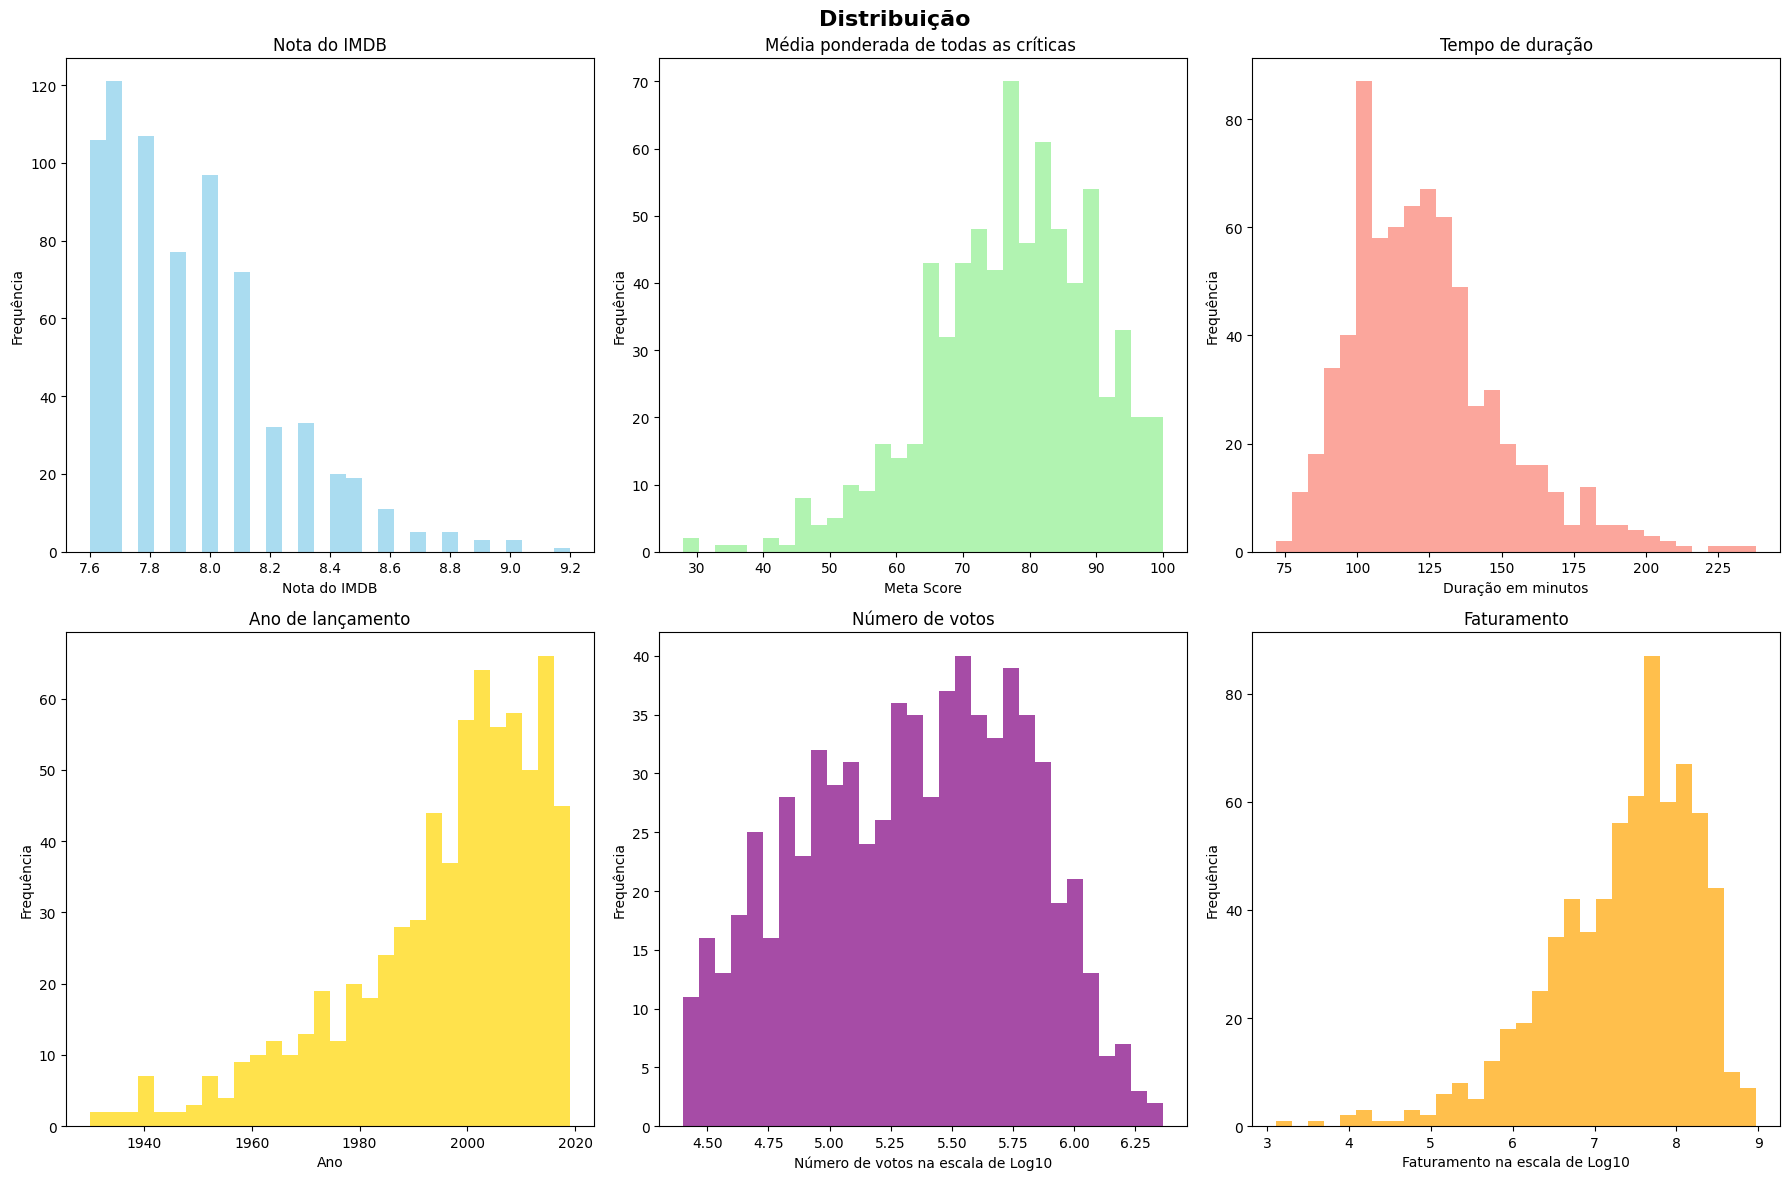

In [143]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Distribuição', fontsize=16, fontweight='bold')
        
# IMDB Rating distribution
axes[0, 0].hist(df['IMDB_Rating'].dropna(), bins=30, alpha=0.7, color='skyblue')
axes[0, 0].set_title('Nota do IMDB')
axes[0, 0].set_xlabel('Nota do IMDB')
axes[0, 0].set_ylabel('Frequência')

# Meta Score distribution
axes[0, 1].hist(df['Meta_score'].dropna(), bins=30, alpha=0.7, color='lightgreen')
axes[0, 1].set_title('Média ponderada de todas as críticas ')
axes[0, 1].set_xlabel('Meta Score')
axes[0, 1].set_ylabel('Frequência')

# Runtime distribution
axes[0, 2].hist(df['Runtime'].dropna(), bins=30, alpha=0.7, color='salmon')
axes[0, 2].set_title('Tempo de duração')
axes[0, 2].set_xlabel('Duração em minutos')
axes[0, 2].set_ylabel('Frequência')
        
# Released Year distribution
axes[1, 0].hist(df['Released_Year'].dropna(), bins=30, alpha=0.7, color='gold')
axes[1, 0].set_title('Ano de lançamento')
axes[1, 0].set_xlabel('Ano')
axes[1, 0].set_ylabel('Frequência')
        
# Number of Votes distribution (log scale)
axes[1, 1].hist(np.log10(df['No_of_Votes'].dropna()), bins=30, alpha=0.7, color='purple')
axes[1, 1].set_title('Número de votos')
axes[1, 1].set_xlabel('Número de votos na escala de Log10')
axes[1, 1].set_ylabel('Frequência')
        
# Gross distribution (log scale)
axes[1, 2].hist(np.log10(df['Gross'].dropna()), bins=30, alpha=0.7, color='orange')
axes[1, 2].set_title('Faturamento')
axes[1, 2].set_xlabel('Faturamento na escala de Log10')
axes[1, 2].set_ylabel('Frequência')
        
plt.tight_layout()
plt.show()

## Correlações

Vou agora analisar a correlação entre as variáveis numéricas

In [144]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("As variáveis numéricas são: \n\n", numerical_columns)

As variáveis numéricas são: 

 Index(['Released_Year', 'Runtime', 'IMDB_Rating', 'Meta_score', 'No_of_Votes',
       'Gross'],
      dtype='object')


<Axes: >

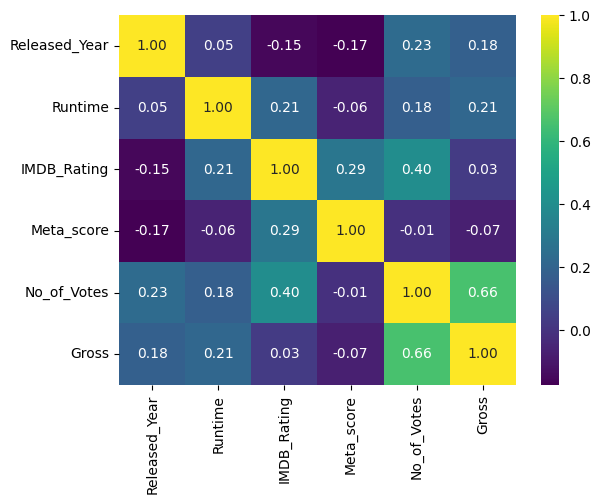

In [145]:
corr = df.select_dtypes(include=['int64', 'float64']).corr(method='spearman', min_periods=1)
sns.heatmap(corr, annot=True, cmap='viridis', fmt='.2f')

In [146]:
print("\nVariáveis com maior correlação (|r| > 0.5):")
for i in range(len(corr.columns)):
    for j in range(i+1, len(corr.columns)):
        if abs(corr.iloc[i, j]) > 0.5:
            print(f"{corr.columns[i]} vs {corr.columns[j]}: {corr.iloc[i, j]:.3f}")


Variáveis com maior correlação (|r| > 0.5):
No_of_Votes vs Gross: 0.658


## Top gêneros

In [147]:
all_genres = []
for genres in df['Genre']:
    all_genres.extend([genre.strip() for genre in genres.split(',')])
        
genre_counts = pd.Series(all_genres).value_counts()

In [148]:
genre_counts

Drama        498
Adventure    162
Comedy       161
Crime        142
Action       140
Thriller      99
Biography     88
Romance       88
Mystery       70
Animation     63
Sci-Fi        56
Fantasy       55
Family        43
History       37
War           29
Music         27
Horror        18
Sport         17
Western       16
Musical       11
Film-Noir      6
Name: count, dtype: int64

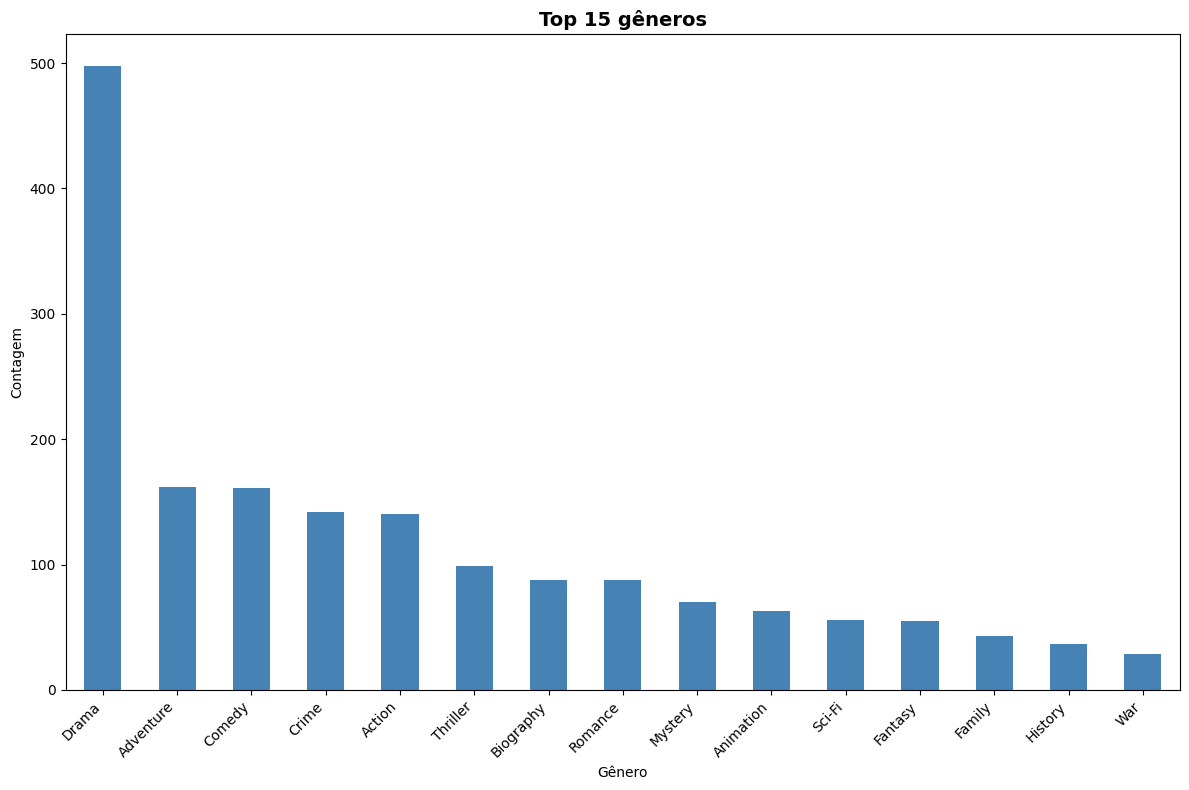

In [149]:
plt.figure(figsize=(12, 8))
genre_counts.head(15).plot(kind='bar', color='steelblue')
plt.title('Top 15 gêneros', fontsize=14, fontweight='bold')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Gênero vs Nota do IMDB

Vou agrupar gênero pela média de votos

In [150]:
genre_ratings = {}
for genre in genre_counts.head(10).index:
    mask = df['Genre'].str.contains(f'\\b{genre}\\b', na=False)
    genre_ratings[genre] = df[mask]['IMDB_Rating'].mean()

genre_rating_df = pd.DataFrame(list(genre_ratings.items()), 
                                     columns=['Genre', 'Average IMDB Rating'])
genre_rating_df = genre_rating_df.sort_values('Average IMDB Rating', ascending=False)

In [151]:
print("Primeiros 5 gêneros:")
print(genre_counts.head(10).index.tolist())
print("\nPrimeiros 5 filmes com seus gêneros:")
print(df[['Series_Title', 'Genre', 'IMDB_Rating']].head())

# verificar um gênero específico
test_genre = genre_counts.head(10).index[0]  # Primeiro gênero
print(f"\nTestando gênero: {test_genre}")
mask = df['Genre'].str.contains(f'\\b{test_genre}\\b', na=False)
print(f"Filmes encontrados: {mask.sum()}")
print(f"Média de rating: {df[mask]['IMDB_Rating'].mean()}")
print(f"Ratings únicos: {df[mask]['IMDB_Rating'].unique()[:10]}")  # Primeiros 10 ratings únicos

Primeiros 5 gêneros:
['Drama', 'Adventure', 'Comedy', 'Crime', 'Action', 'Thriller', 'Biography', 'Romance', 'Mystery', 'Animation']

Primeiros 5 filmes com seus gêneros:
                                    Series_Title                     Genre  \
0                                  The Godfather              Crime, Drama   
1                                The Dark Knight      Action, Crime, Drama   
2                         The Godfather: Part II              Crime, Drama   
3                                   12 Angry Men              Crime, Drama   
4  The Lord of the Rings: The Return of the King  Action, Adventure, Drama   

   IMDB_Rating  
0            9  
1            9  
2            9  
3            9  
4            9  

Testando gênero: Drama
Filmes encontrados: 498
Média de rating: 7.939357429718875
Ratings únicos: [9.2 9.  8.9 8.8 8.7 8.6 8.5 8.4 8.3 8.2]


In [152]:
for genre in genre_counts.head(10).index:
    mask = df['Genre'].str.contains(f'\\b{genre}\\b', na=False)
    avg_rating = df[mask]['IMDB_Rating'].mean()
    print(f"{genre}: {avg_rating:.4f}")

Drama: 7.9394
Adventure: 7.9654
Comedy: 7.8733
Crime: 7.9430
Action: 7.9371
Thriller: 7.9152
Biography: 7.9091
Romance: 7.9250
Mystery: 7.9471
Animation: 7.9270


In [153]:
genre_rating_df

,Genre,Average IMDB Rating
1,Adventure,8
8,Mystery,8
3,Crime,8
0,Drama,8
4,Action,8
9,Animation,8
7,Romance,8
5,Thriller,8
6,Biography,8
2,Comedy,8


Achei que havia alguma coisa de errado porque todos os gêneros estavam sendo retornados com a média de 8, mas após verificar novamente, parece que todos os gêneros possuem avaliação média entre 7.87 e 7.96

Como a média de votos é praticamente a mesma para todos, não vou mais analisar pela média de votos mas sim pela quantidade total de votos por gênero.

In [154]:
genre_total_votes = {}
for genre in genre_counts.head(10).index:
    mask = df['Genre'].str.contains(f'\\b{genre}\\b', na=False)
    genre_total_votes[genre] = df[mask]['No_of_Votes'].sum()  # Soma total de votos

genre_votes_df = pd.DataFrame(list(genre_total_votes.items()), 
                              columns=['Genre', 'Total Votes'])
genre_votes_df = genre_votes_df.sort_values('Total Votes', ascending=False)

In [155]:
genre_votes_df

,Genre,Total Votes
0,Drama,156153620
1,Adventure,80760296
4,Action,73119766
3,Crime,54003235
2,Comedy,47940065
5,Thriller,38960254
8,Mystery,26958439
6,Biography,25804988
7,Romance,23162676
9,Animation,20331427


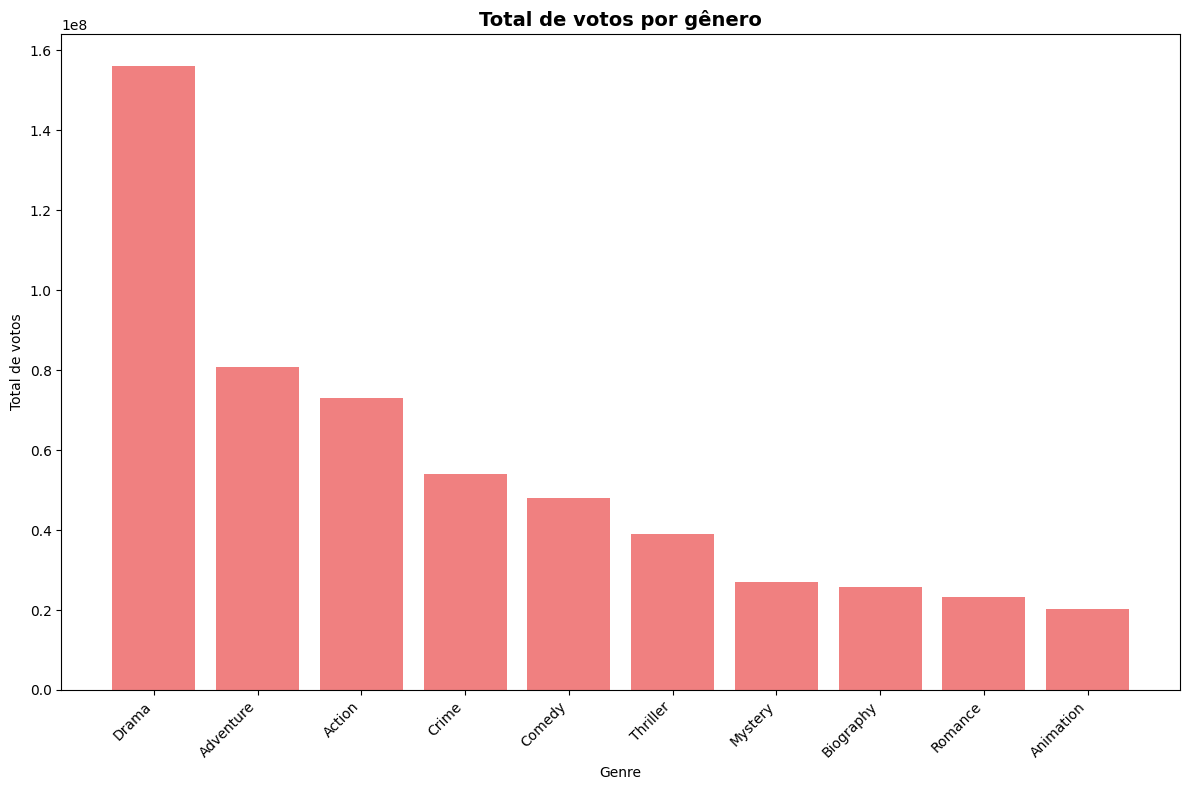

In [156]:
plt.figure(figsize=(12, 8))
plt.bar(genre_votes_df['Genre'], genre_votes_df['Total Votes'], 
               color='lightcoral')
plt.title('Total de votos por gênero', fontsize=14, fontweight='bold')
plt.xlabel('Genre')
plt.ylabel('Total de votos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Top 10 filmes com maior nota no IMDB

In [157]:
pd.set_option('display.float_format', '{:.1f}'.format)
top_10_rated = df.nlargest(10, 'IMDB_Rating')[['Series_Title', 'Genre', 'IMDB_Rating', 'No_of_Votes']]

top_10_rated = top_10_rated.sort_values('No_of_Votes', ascending=False).reset_index(drop=True)
top_10_rated

,Series_Title,Genre,IMDB_Rating,No_of_Votes
0,The Dark Knight,"Action, Crime, Drama",9.0,2303232
1,Inception,"Action, Adventure, Sci-Fi",8.8,2067042
2,Fight Club,Drama,8.8,1854740
3,Pulp Fiction,"Crime, Drama",8.9,1826188
4,The Lord of the Rings: The Fellowship of the Ring,"Action, Adventure, Drama",8.8,1661481
5,The Lord of the Rings: The Return of the King,"Action, Adventure, Drama",8.9,1642758
6,The Godfather,"Crime, Drama",9.2,1620367
7,Schindler's List,"Biography, Drama, History",8.9,1213505
8,The Godfather: Part II,"Crime, Drama",9.0,1129952
9,12 Angry Men,"Crime, Drama",9.0,689845


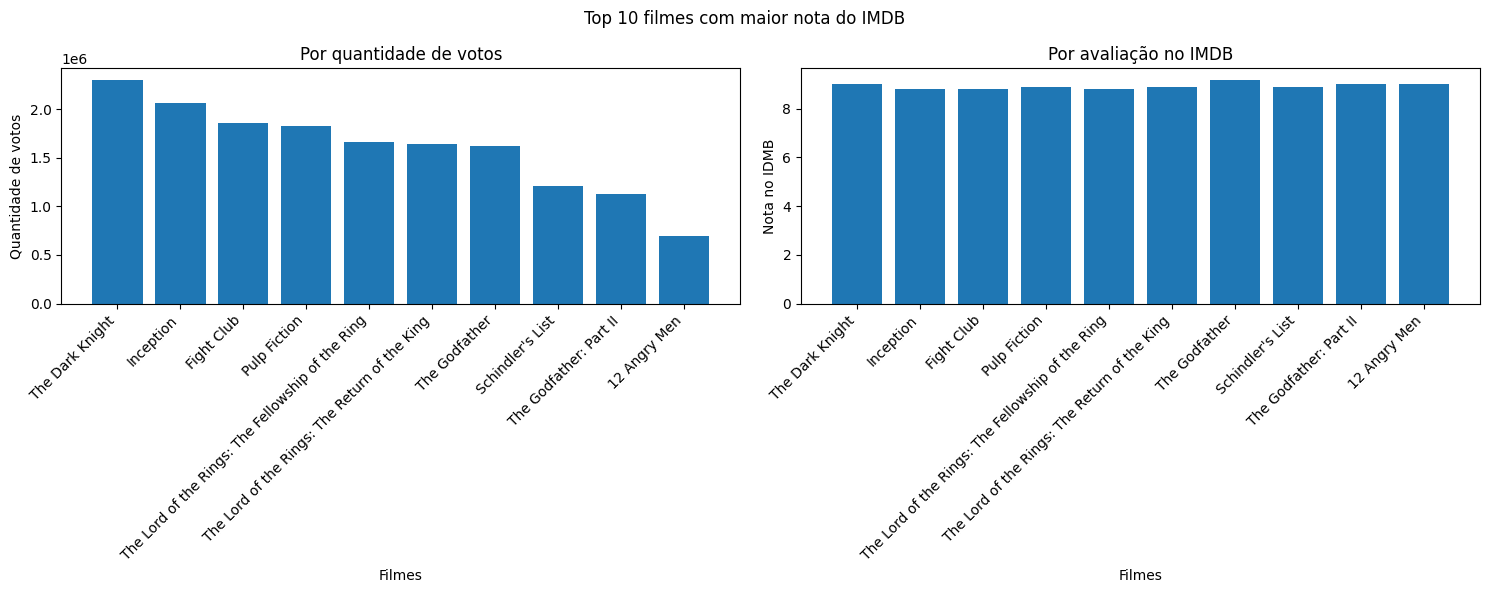

In [158]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Top 10 filmes com maior nota do IMDB')

ax1.bar(range(len(top_10_rated)), top_10_rated['No_of_Votes'])
ax1.set_title('Por quantidade de votos')
ax1.set_xlabel('Filmes')
ax1.set_ylabel('Quantidade de votos')
ax1.set_xticks(range(len(top_10_rated)))
ax1.set_xticklabels(top_10_rated['Series_Title'], rotation=45, ha='right')

ax2.bar(range(len(top_10_rated)), top_10_rated['IMDB_Rating'])
ax2.set_title('Por avaliação no IMDB')
ax2.set_xlabel('Filmes')
ax2.set_ylabel('Nota no IDMB')
ax2.set_xticks(range(len(top_10_rated)))
ax2.set_xticklabels(top_10_rated['Series_Title'], rotation=45, ha='right')

plt.tight_layout()
plt.show()

'The Dark Night' possui maior avaliação no IDMB e maior quantidade de votos. Já 'The Godfather' possui apenas maior avaliação no IDMB.

## Análise da variável 'Ano'

In [159]:
year_rating = df.groupby('Released_Year')['IMDB_Rating'].mean()

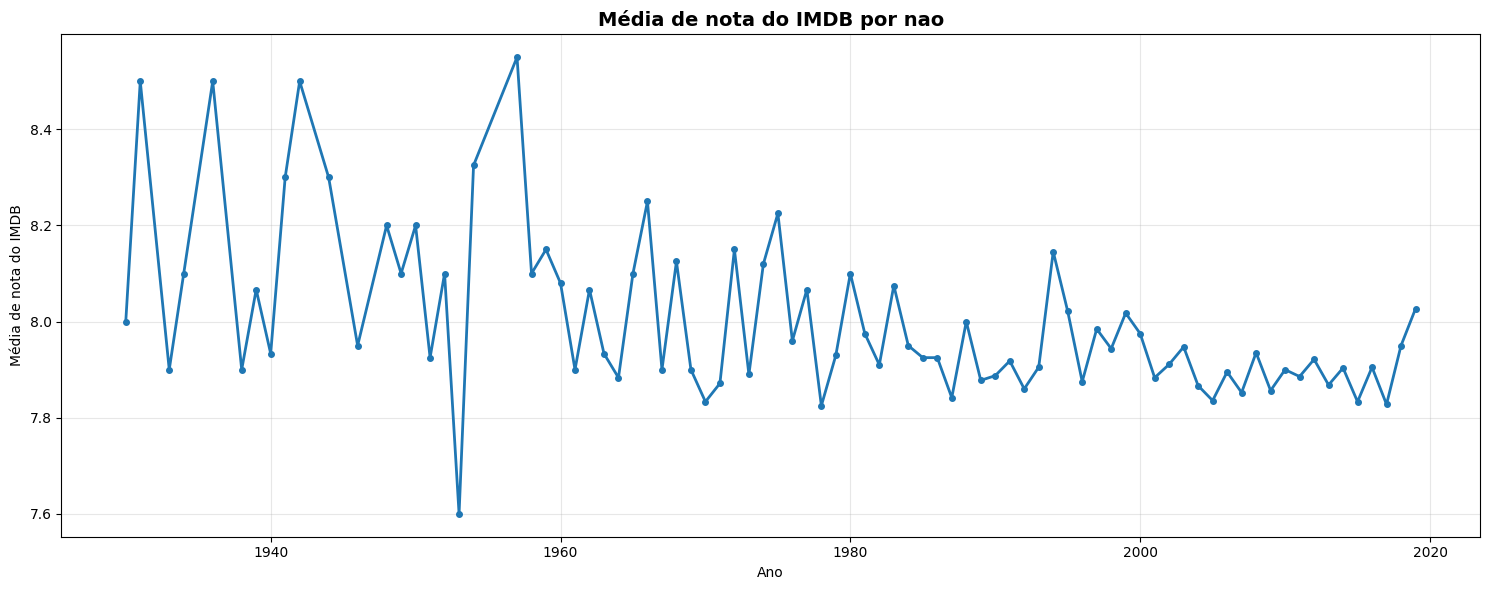

In [160]:
plt.figure(figsize=(15, 6))
plt.plot(year_rating.index, year_rating.values, marker='o', linewidth=2, markersize=4)
plt.title('Média de nota do IMDB por nao', fontsize=14, fontweight='bold')
plt.xlabel('Ano')
plt.ylabel('Média de nota do IMDB')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [161]:
movies_per_year = df['Released_Year'].value_counts().sort_index()

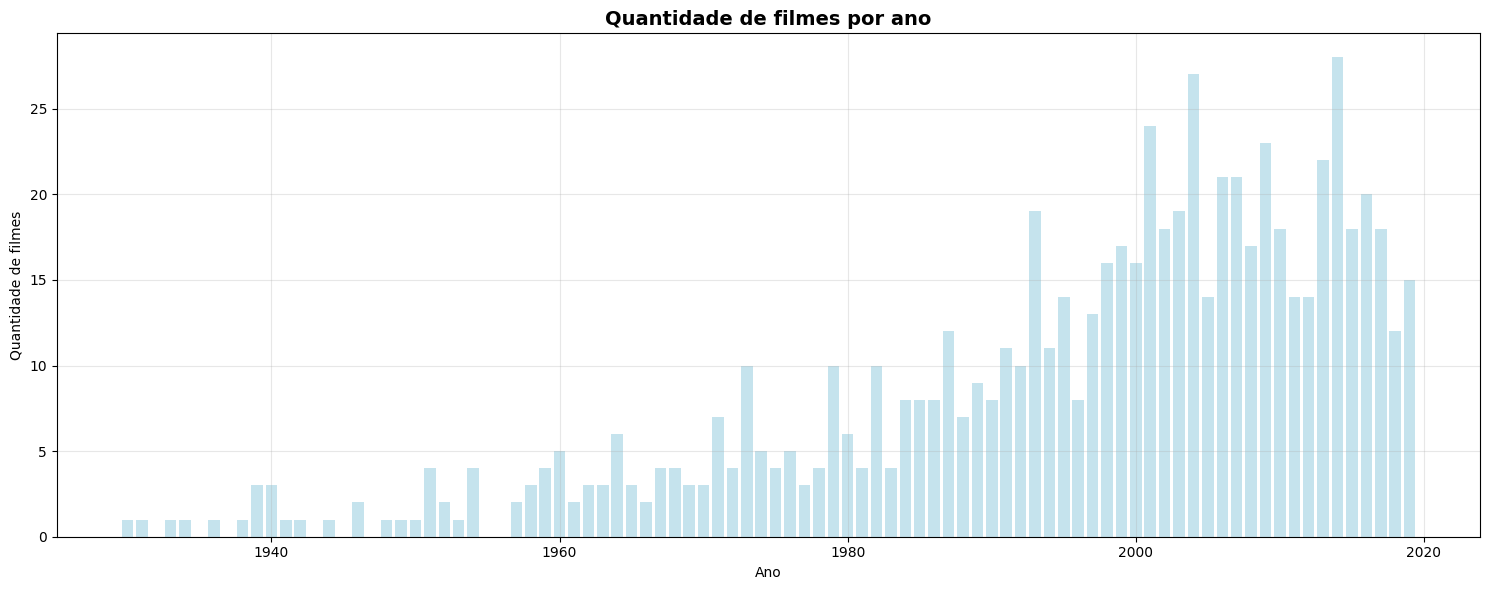

In [162]:
plt.figure(figsize=(15, 6))
plt.bar(movies_per_year.index, movies_per_year.values, alpha=0.7, color='lightblue')
plt.title('Quantidade de filmes por ano', fontsize=14, fontweight='bold')
plt.xlabel('Ano')
plt.ylabel('Quantidade de filmes')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [163]:
print(f"\nAnos com maior média de notas do IMDB:")
print(year_rating.nlargest(5))
        



Anos com maior média de notas do IMDB:
Released_Year
1957   8.6
1931   8.5
1936   8.5
1942   8.5
1954   8.3
Name: IMDB_Rating, dtype: float64


In [164]:
print(f"\nAnos com maior quantidade de filmes:")
print(movies_per_year.head())


Anos com maior quantidade de filmes:
Released_Year
1930    1
1931    1
1933    1
1934    1
1936    1
Name: count, dtype: int64


## Análise entre diretores e atores

In [165]:
director_ratings = df.groupby('Director')['IMDB_Rating'].agg(['mean', 'count']).reset_index()
director_ratings = director_ratings[director_ratings['count'] >= 3]
director_ratings = director_ratings.sort_values('mean', ascending=False)

Achei que seria justo que, para essa análise, fosse levado em conta que o diretor deveria ter ao menos 3 filmes

In [166]:
print("\nTop 10 diretores por média de notas do IMDB com o mínimo de 3 filmes:")
print(director_ratings.head(10))


Top 10 diretores por média de notas do IMDB com o mínimo de 3 filmes:
                 Director  mean  count
59      Christopher Nolan   8.5      8
100  Francis Ford Coppola   8.4      5
286         Peter Jackson   8.4      5
343       Stanley Kubrick   8.3      6
335          Sergio Leone   8.2      5
34           Billy Wilder   8.2      4
292     Quentin Tarantino   8.2      8
236       Martin Scorsese   8.2     10
39           Bong Joon Ho   8.2      3
14       Alfred Hitchcock   8.1      9


In [167]:
star_columns = ['Star1', 'Star2', 'Star3', 'Star4']

In [168]:
all_stars = []
for col in star_columns:
    all_stars.extend(df[col].dropna().tolist())
        
star_counts = pd.Series(all_stars).value_counts()
top_stars = star_counts[star_counts >= 3].index
top_stars

Index(['Robert De Niro', 'Al Pacino', 'Tom Hanks', 'Brad Pitt',
       'Clint Eastwood', 'Christian Bale', 'Leonardo DiCaprio', 'Matt Damon',
       'Ethan Hawke', 'Scarlett Johansson',
       ...
       'Charlton Heston', 'Elijah Wood', 'Arnold Schwarzenegger',
       'Humphrey Bogart', 'Robin Wright', 'Guy Pearce', 'Gene Wilder',
       'Ben Affleck', 'James Stewart', 'Woody Harrelson'],
      dtype='object', length=201)

In [169]:
star_ratings = {}
for star in top_stars:
    mask = (df[star_columns] == star).any(axis=1)
    star_ratings[star] = df[mask]['IMDB_Rating'].mean()
        
star_rating_df = pd.DataFrame(list(star_ratings.items()), 
                                    columns=['Star', 'Average IMDB Rating'])
star_rating_df = star_rating_df.sort_values('Average IMDB Rating', ascending=False)
star_rating_df

,Star,Average IMDB Rating
192,Elijah Wood,8.8
90,Orlando Bloom,8.6
104,Mark Hamill,8.5
68,Marlon Brando,8.4
158,Lee J. Cobb,8.4
...,...,...
116,Jude Law,7.7
167,Danny Glover,7.7
61,Samantha Morton,7.7
113,Nicolas Cage,7.6


In [170]:
print("\nTop 10 atores(as) por média de nota do IMDB com no mínimo 2 filmes:")
print(star_rating_df.head(10))


Top 10 atores(as) por média de nota do IMDB com no mínimo 2 filmes:
              Star  Average IMDB Rating
192    Elijah Wood                  8.8
90   Orlando Bloom                  8.6
104    Mark Hamill                  8.5
68   Marlon Brando                  8.4
158    Lee J. Cobb                  8.4
48    Diane Keaton                  8.3
170  Alec Guinness                  8.3
162     James Caan                  8.3
138  Robert Duvall                  8.3
41    Kevin Spacey                  8.3


## Análise de padrões de faturamento

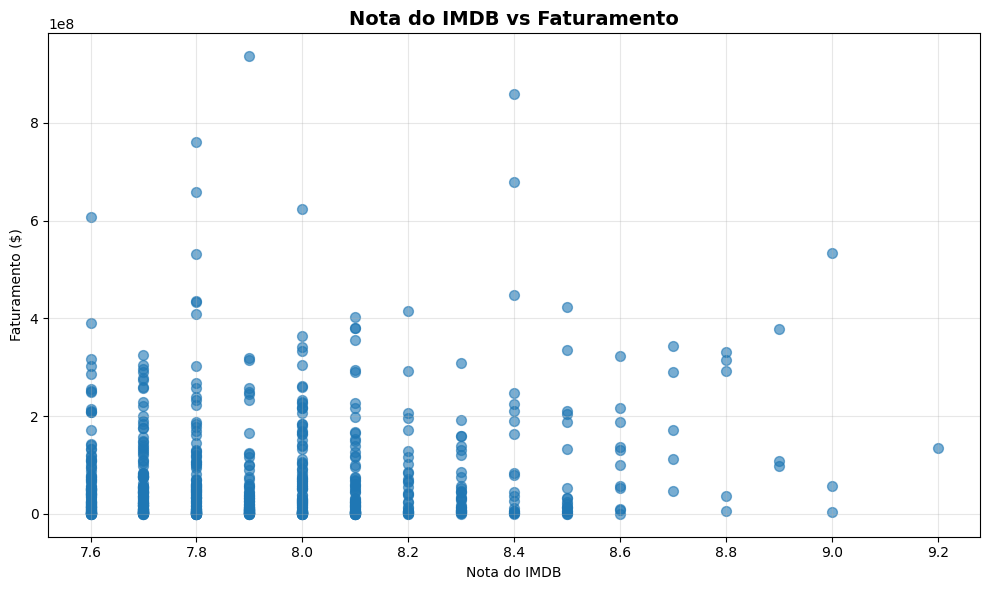

In [171]:
plt.figure(figsize=(10, 6))
plt.scatter(df['IMDB_Rating'], df['Gross'], alpha=0.6, s=50)
plt.title('Nota do IMDB vs Faturamento', fontsize=14, fontweight='bold')
plt.xlabel('Nota do IMDB')
plt.ylabel('Faturamento ($)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [172]:
top_movies = df.nlargest(10, 'Gross')[['Series_Title', 'Gross', 'IMDB_Rating', 'Released_Year']]
print("\nTop 10 highest grossing movies:")
top_movies


Top 10 highest grossing movies:


,Series_Title,Gross,IMDB_Rating,Released_Year
476,Star Wars: Episode VII - The Force Awakens,936662225.0,7.9,2015
58,Avengers: Endgame,858373000.0,8.4,2019
622,Avatar,760507625.0,7.8,2009
59,Avengers: Infinity War,678815482.0,8.4,2018
651,Titanic,659325379.0,7.8,1997
356,The Avengers,623279547.0,8.0,2012
890,Incredibles 2,608581744.0,7.6,2018
1,The Dark Knight,534858444.0,9.0,2008
581,Rogue One,532177324.0,7.8,2016
62,The Dark Knight Rises,448139099.0,8.4,2012


In [173]:
genre_revenue = {}
for genre in df['Genre'].dropna().unique():
    mask = df['Genre'] == genre
    genre_revenue[genre] = df[mask]['Gross'].mean()
        
genre_revenue_df = pd.DataFrame(list(genre_revenue.items()), 
                                      columns=['Genre', 'Average Gross Revenue'])
genre_revenue_df = genre_revenue_df.sort_values('Average Gross Revenue', ascending=False)

In [174]:
print("\nTop 10 genres by average gross revenue:")
genre_revenue_df.head(10)


Top 10 genres by average gross revenue:


,Genre,Average Gross Revenue
147,"Family, Sci-Fi",435110554.0
10,"Action, Adventure, Fantasy",352723505.2
164,"Action, Adventure, Family",301959197.0
4,"Action, Adventure, Sci-Fi",280888545.7
139,"Adventure, Fantasy",280685211.5
96,"Action, Adventure, Comedy",273028864.0
109,"Adventure, Thriller",260000000.0
161,"Animation, Comedy, Crime",251513985.0
32,"Action, Adventure",229507242.4
47,"Animation, Adventure, Comedy",225166879.9


## Análise da descrição dos flmes

In [175]:
df['Overview_Length'] = df['Overview'].str.len()

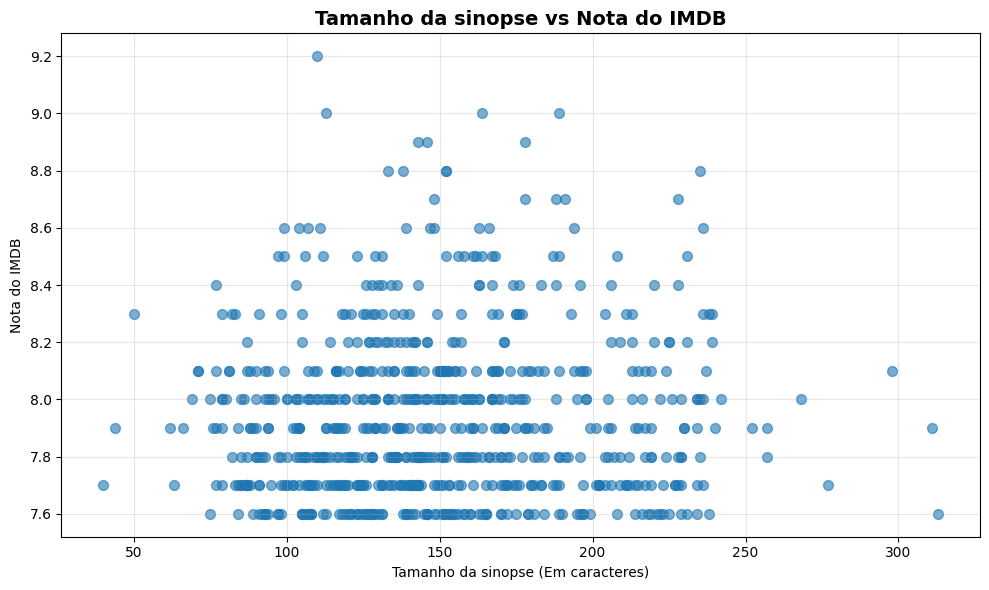

In [176]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Overview_Length'], df['IMDB_Rating'], alpha=0.6, s=50)
plt.title('Tamanho da sinopse vs Nota do IMDB', fontsize=14, fontweight='bold')
plt.xlabel('Tamanho da sinopse (Em caracteres)')
plt.ylabel('Nota do IMDB')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [177]:
correlation = df['Overview_Length'].corr(df['IMDB_Rating'])
print(f"\nCorrelation between overview length and IMDB rating: {correlation:.3f}")


Correlation between overview length and IMDB rating: 0.048


---

# Respostas da análise exploratória

## 1. Qual filme você recomendaria para uma pessoa que você não conhece?

In [178]:
recommendation_criteria = (
    (df['IMDB_Rating'] >= 8.0) &
    (df['Meta_score'] >= 70) &
    (df['Runtime'] >= 90) &
    (df['Runtime'] <= 150) &
    (df['No_of_Votes'] >= 10000)
)
        
recommended_movies = df[recommendation_criteria].sort_values('IMDB_Rating', ascending=False)
for _, movie in recommended_movies.head(5).iterrows():
    print(f"- {movie['Series_Title']} ({movie['Released_Year']}) - Nota: {movie['IMDB_Rating']:.1f}")

- 12 Angry Men (1957) - Nota: 9.0
- Inception (2010) - Nota: 8.8
- Forrest Gump (1994) - Nota: 8.8
- The Matrix (1999) - Nota: 8.7
- Goodfellas (1990) - Nota: 8.7


## 2. Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?

In [179]:
high_revenue_threshold = df['Gross'].quantile(0.75)
high_revenue_movies = df[df['Gross'] >= high_revenue_threshold]
        
print(f"High revenue threshold: ${high_revenue_threshold:,.0f}")
print(f"Number of high revenue movies: {len(high_revenue_movies)}")
        
        # Compare characteristics
print("\nCharacteristics comparison (High Revenue vs All Movies):")
comparison_cols = ['IMDB_Rating', 'Meta_score', 'Runtime', 'No_of_Votes']
        
for col in comparison_cols:
    high_rev_mean = high_revenue_movies[col].mean()
    all_mean = df[col].mean()
    print(f"{col}: {high_rev_mean:.2f} vs {all_mean:.2f}")

High revenue threshold: $102,360,615
Number of high revenue movies: 178

Characteristics comparison (High Revenue vs All Movies):
IMDB_Rating: 8.00 vs 7.94
Meta_score: 76.88 vs 77.15
Runtime: 129.48 vs 123.67
No_of_Votes: 669366.32 vs 353466.23


## 3. Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?

In [180]:
print("Overview analysis for genre prediction:")
print("- Overview length varies significantly between genres")
print("- Certain keywords in overviews correlate with specific genres")
print("- Text analysis can be used for genre classification")

print("\nExample overviews by genre:")
for genre in ['Drama', 'Action', 'Comedy']:
    sample = df[df['Genre'].str.contains(genre, na=False)]['Overview'].iloc[0]
    print(f"{genre}: {sample[:100]}...")

Overview analysis for genre prediction:
- Overview length varies significantly between genres
- Certain keywords in overviews correlate with specific genres
- Text analysis can be used for genre classification

Example overviews by genre:
Drama: An organized crime dynasty's aging patriarch transfers control of his clandestine empire to his relu...
Action: When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman must accep...
Comedy: Greed and class discrimination threaten the newly formed symbiotic relationship between the wealthy ...


## Explique como você faria a previsão da nota do imdb a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?

Como a variável nota do IMDB se trata de uma variável numérica e contínua, temos aqui um problema de regressão, e não de classificação, pois queremos prever um valor numérico, e não uma categoria.

Para construir o modelo, realizei algumas transformaçoes nas variáveis ['Released_Year','Runtime','Meta_score','No_of_votes','Gross'] pois se tratavam de variáveis numéricas, mas estavam como dtype = objeto, o que as invalidava para o cálculo de correlação, além de que seria preciso utilizar vários tipos de encoders para processá-las caso não houvesse conversão de tipo (Modelos de processamento não aceitam strings ou variáveis categóricas. É preciso "transformá-las em números"). Quanto as categóricas, para a modelagem, utilizei apenas o primero (principal) gênero de filme e foi criado o atributo 'Overview_length' para contar o tamanho em caracteres de cada sinopse, o que mostrou que filmes com sinopses ou muito longas ou muito curtas tendem a ter uma nota baixa no IMDB.

O modelo de Random Forest foi o que alcançou melhores resultados, porque obteve R² mais próximo de 1, o que explica 58,25% de variância e o RMSE de 0.1870, o que indica um erro médio de 0,19 pontos. Vantagens: menos sensível a outliers, mostra quais variáveis são mais importantes, menos propenso ao overfitting que modelos lineares, captura relações não-lineares. Negativos: Pode ainda sofrer overfitting com datasets muito pequenos (como nesse caso), é um "black box" (difícil interpretar).

Como medidas de performance foi escolhido: R² (Coeficiente de Determinação),RMSE (Root Mean Square Error), MAE (Mean Absolute Error)

- R²: Mede quanto da variância é explicada pelo modelo
    
    Interpretação: 0.5825 = 58.25% da variação nas notas é explicada pelas features

- RMSE: Mede o erro médio em pontos de rating
    
    Interpretação: 0.1870 = erro médio de ~0.19 pontos na escala 1-10

- MAE : Mede o erro absoluto médio
    
    Interpretação: 0.1510 = erro absoluto médio de ~0.15 pontos

---

# Preparação dos dados para modelagem

In [181]:
df_model = df.copy()

## Eng. de atributos

In [182]:
df_model['Overview_Length'] = df_model['Overview'].str.len()
df_model['Overview_Length'] = df_model['Overview_Length'].fillna(df_model['Overview_Length'].median())

In [183]:
df_model['Primary_Genre'] = df_model['Genre'].str.split(',').str[0].str.strip()

## Transformação de variáveis categóricas para modelagem

In [184]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
label_encoders = {}

In [185]:
categorical_cols = ['Primary_Genre', 'Certificate', 'Director']
for col in categorical_cols:
    if col in df_model.columns:
        le = LabelEncoder()
        df_model[f'{col}_encoded'] = le.fit_transform(df_model[col].fillna('Unknown'))
        label_encoders[col] = le

In [186]:
feature_cols = ['Released_Year', 'Runtime', 'Meta_score', 'No_of_Votes', 
                       'Gross', 'Overview_Length', 'Primary_Genre_encoded', 
                       'Certificate_encoded', 'Director_encoded']
        
X = df_model[feature_cols].dropna()
y = df_model.loc[X.index, 'IMDB_Rating']

In [187]:
print(f"Feature matrix shape: {X.shape}")
print(f"Target shape: {y.shape}")

Feature matrix shape: (712, 9)
Target shape: (712,)


---

# Modelagem

In [188]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [189]:
sc = StandardScaler()

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [191]:
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [192]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

In [193]:
results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    
    if name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
    'MSE': mse,
    'MAE': mae,
    'R2': r2,
    'RMSE': np.sqrt(mse)
    }

    print(f"{name} - MSE: {mse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}, RMSE: {np.sqrt(mse):.4f}")


Training Linear Regression...
Linear Regression - MSE: 0.0366, MAE: 0.1536, R²: 0.5633, RMSE: 0.1913

Training Ridge Regression...
Ridge Regression - MSE: 0.0366, MAE: 0.1536, R²: 0.5633, RMSE: 0.1913

Training Lasso Regression...
Lasso Regression - MSE: 0.0643, MAE: 0.2068, R²: 0.2325, RMSE: 0.2536

Training Random Forest...


Random Forest - MSE: 0.0350, MAE: 0.1510, R²: 0.5825, RMSE: 0.1870

Training Gradient Boosting...
Gradient Boosting - MSE: 0.0362, MAE: 0.1508, R²: 0.5676, RMSE: 0.1903


In [194]:
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
results_df


Model Performance Comparison:


,MSE,MAE,R2,RMSE
Linear Regression,0.0,0.2,0.6,0.2
Ridge Regression,0.0,0.2,0.6,0.2
Lasso Regression,0.1,0.2,0.2,0.3
Random Forest,0.0,0.2,0.6,0.2
Gradient Boosting,0.0,0.2,0.6,0.2


In [195]:
best_model_name = results_df['R2'].idxmax()
best_model = models[best_model_name]

print(f"\nBest model: {best_model_name} (R² = {results_df.loc[best_model_name, 'R2']:.4f})")


Best model: Random Forest (R² = 0.5825)



Importância de atributos:
                 feature  importance
3            No_of_Votes         0.5
0          Released_Year         0.1
2             Meta_score         0.1
4                  Gross         0.1
1                Runtime         0.0
8       Director_encoded         0.0
5        Overview_Length         0.0
7    Certificate_encoded         0.0
6  Primary_Genre_encoded         0.0


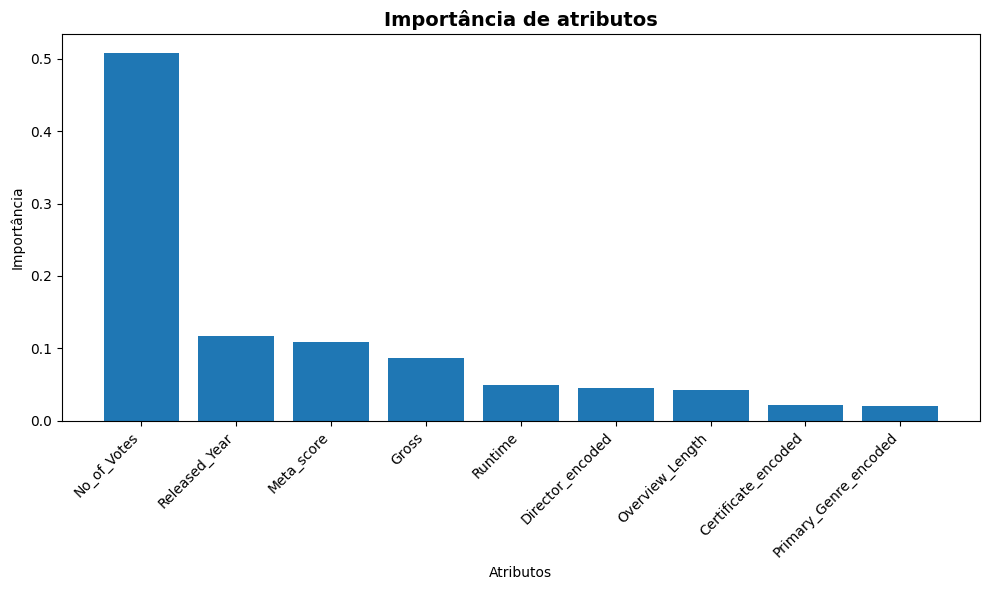

(                   MSE  MAE  R2  RMSE
 Linear Regression  0.0  0.2 0.6   0.2
 Ridge Regression   0.0  0.2 0.6   0.2
 Lasso Regression   0.1  0.2 0.2   0.3
 Random Forest      0.0  0.2 0.6   0.2
 Gradient Boosting  0.0  0.2 0.6   0.2,
 RandomForestRegressor(random_state=42))

In [196]:
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print("\nImportância de atributos:")
    print(feature_importance)
    
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    plt.bar(feature_importance['feature'], feature_importance['importance'])
    plt.title('Importância de atributos', fontsize=14, fontweight='bold')
    plt.xlabel('Atributos')
    plt.ylabel('Importância')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

#model = best_model
results_df, best_model

---

# Previsão da nota do IMDB utilizando os dados fornecidos

In [197]:
movie_data = {'Series_Title': 'The Shawshank Redemption',
 'Released_Year': '1994',
 'Certificate': 'A',
 'Runtime': '142 min',
 'Genre': 'Drama',
 'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
 'Meta_score': 80.0,
 'Director': 'Frank Darabont',
 'Star1': 'Tim Robbins',
 'Star2': 'Morgan Freeman',
 'Star3': 'Bob Gunton',
 'Star4': 'William Sadler',
 'No_of_Votes': 2343110,
 'Gross': '28,341,469'
}

sample_df = pd.DataFrame([movie_data])
sample_df

,Series_Title,Released_Year,Certificate,Runtime,Genre,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"


Aplicando o mesmo pré-processamento

In [198]:
sample_df['Released_Year'] = pd.to_numeric(sample_df['Released_Year'], errors='coerce', downcast='integer')
sample_df['Runtime'] = sample_df['Runtime'].str.replace(' min', '').astype(int)
sample_df['Gross'] = sample_df['Gross'].str.replace('$', '').str.replace(',', '').astype(float)
sample_df['Overview_Length'] = sample_df['Overview'].str.len()
sample_df['Primary_Genre'] = sample_df['Genre'].str.split(',').str[0].str.strip()

In [199]:
label_encoders = {}

for col in ['Primary_Genre', 'Certificate', 'Director']:
    if col in sample_df.columns:
        le = LabelEncoder()
        # Fit the encoder on the data and transform it
        sample_df[f'{col}_encoded'] = le.fit_transform(sample_df[col].fillna('Unknown'))
        # Store the encoder for later use
        label_encoders[col] = le

sample_df

,Series_Title,Released_Year,Certificate,Runtime,Genre,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Overview_Length,Primary_Genre,Primary_Genre_encoded,Certificate_encoded,Director_encoded
0,The Shawshank Redemption,1994,A,142,Drama,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0,118,Drama,0,0,0


In [200]:
feature_cols = ['Released_Year', 'Runtime', 'Meta_score', 'No_of_Votes', 
                        'Gross', 'Overview_Length', 'Primary_Genre_encoded', 
                        'Certificate_encoded', 'Director_encoded']

X_sample = sample_df[feature_cols]
X_sample.shape

(1, 9)

In [201]:
if hasattr(model, 'predict'):
    prediction = model.predict(X_sample)[0]
    print(f"Nota prevista para o filme '{movie_data['Series_Title']}': {prediction:.2f}")
    prediction
else:
    print("Erro ao treinar modelo")

Nota prevista para o filme 'The Shawshank Redemption': 8.88


## Salvando o modelo (.pkl)

In [202]:
scaler = StandardScaler()
scaler.fit(X_train)

,copy,True
,with_mean,True
,with_std,True


In [203]:
model_data = {
    'model': model,
    'scaler': scaler,
    'label_encoders': label_encoders,
    'feature_columns': ['Released_Year', 'Runtime', 'Meta_score', 'No_of_Votes', 
                        'Gross', 'Overview_Length', 'Primary_Genre_encoded', 
                        'Certificate_encoded', 'Director_encoded']
}

In [204]:
import pickle

with open('imdb_rating_model.pkl', 'wb') as f:
    pickle.dump(model_data, f)
print("Modelo salvo com sucesso.")

Modelo salvo com sucesso.
